In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


## **Lendo DataSet e apresentando**

In [2]:
df=pd.read_csv("/kaggle/input/corona-virus-report/covid_19_clean_complete.csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


## **Apresentando Informações de Linhas e Colunas**

In [3]:
print ('Quantidade de Linhas e Colunas: ', df.shape) # Demonstrando numero de linhas/colunas do dataframe
print ('Colunas: ', list(df.columns)) # Mostrando as colunas


df['Date'] = pd.to_datetime(df['Date'])
print ('\nTipo da Data:', df.Date.dtypes) # Trocando o tipo de informação que está na coluna de Date

Quantidade de Linhas e Colunas:  (49068, 10)
Colunas:  ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'WHO Region']

Tipo da Data: datetime64[ns]


## **Valores Estátisticos**

In [4]:
print ( df.describe() ) # Valores estátisticos

d1=df.groupby("Country/Region")["Deaths"].max().reset_index() 
d1=d1.sort_values("Deaths",ascending=False).head(10) # 10 Paises com mais mortes
print ('\n',d1)

                Lat          Long                           Date  \
count  49068.000000  49068.000000                          49068   
mean      21.433730     23.528236  2020-04-24 11:59:59.999999744   
min      -51.796300   -135.000000            2020-01-22 00:00:00   
25%        7.873054    -15.310100            2020-03-08 18:00:00   
50%       23.634500     21.745300            2020-04-24 12:00:00   
75%       41.204380     80.771797            2020-06-10 06:00:00   
max       71.706900    178.065000            2020-07-27 00:00:00   
std       24.950320     70.442740                            NaN   

          Confirmed         Deaths     Recovered        Active  
count  4.906800e+04   49068.000000  4.906800e+04  4.906800e+04  
mean   1.688490e+04     884.179160  7.915713e+03  8.085012e+03  
min    0.000000e+00       0.000000  0.000000e+00 -1.400000e+01  
25%    4.000000e+00       0.000000  0.000000e+00  0.000000e+00  
50%    1.680000e+02       2.000000  2.900000e+01  2.600000e+01

## **Provincias da China**

In [5]:
provinces_china = df.loc[df['Country/Region'] == 'China']['Province/State'].unique() # Filtrando os dados que vem da China
china_data = df[df['Province/State'].isin(provinces_china)] # Criando um dataframe apenas com esses dados
china_filt = china_data[['Province/State', 'Confirmed', 'Active', 'Deaths', 'Recovered']] #Separando as informações que me interessam

print("\n", china_filt) 
top_regions = china_filt.groupby(['Province/State'])['Confirmed'].max().reset_index() # Ordenando regiões com maior numero de confirmações
top_regions = top_regions.sort_values('Confirmed', ascending = False).head(5) # Escolhendo as 5 maiores
print ('\n', top_regions) 



       Province/State  Confirmed  Active  Deaths  Recovered
48             Anhui          1       1       0          0
49           Beijing         14      14       0          0
50         Chongqing          6       6       0          0
51            Fujian          1       1       0          0
52             Gansu          0       0       0          0
...              ...        ...     ...     ...        ...
48883        Tianjin        204       6       3        195
48884          Tibet          1       0       0          1
48885       Xinjiang        311     235       3         73
48886         Yunnan        190       2       2        186
48887       Zhejiang       1270       1       1       1268

[6204 rows x 5 columns]

    Province/State  Confirmed
13          Hubei      68135
12      Hong Kong       2778
5       Guangdong       1672
11          Henan       1276
32       Zhejiang       1270


## **Colunas com dados Perdidos**

In [6]:
# Função que tenha uma linha do banco de dados como argumento
def concat_province_country(row):
    if pd.notna(row['Province/State']):
        return f"{row['Country/Region']}_{row['Province/State']}"
    else:
        return row['Country/Region']

# Faça uma cópia do banco de dados para poder retirar informações sem perder o banco de dados original
df_concat = df.copy() # Banco de dados para concatenar e retirar apenas Country/Province
df_new = df.copy() # Banco de dados para retirar outras informações

df_concat = df.loc[df['Country/Region'] == 'China']
china_new_data = df[df['Province/State'].isin(df_concat)]


# Aplique, por meio do método “apply”, a função criada no item
df_concat = df_concat.apply(concat_province_country, axis=1)

# Apagando a coluna de province/state
df_new.drop(columns=['Province/State'], inplace=True)

In [7]:
df_new['Country/Province'] = df_concat # Criando no banco de dados novos uma coluna com os valores concatenados
print(df_new)
df_new = df_new.loc[df_new['Country/Region'] == 'China'] # Filtrando valores do banco de dados para termos dados apenas da China

              Country/Region        Lat       Long       Date  Confirmed  \
0                Afghanistan  33.939110  67.709953 2020-01-22          0   
1                    Albania  41.153300  20.168300 2020-01-22          0   
2                    Algeria  28.033900   1.659600 2020-01-22          0   
3                    Andorra  42.506300   1.521800 2020-01-22          0   
4                     Angola -11.202700  17.873900 2020-01-22          0   
...                      ...        ...        ...        ...        ...   
49063  Sao Tome and Principe   0.186400   6.613100 2020-07-27        865   
49064                  Yemen  15.552727  48.516388 2020-07-27       1691   
49065                Comoros -11.645500  43.333300 2020-07-27        354   
49066             Tajikistan  38.861000  71.276100 2020-07-27       7235   
49067                Lesotho -29.610000  28.233600 2020-07-27        505   

       Deaths  Recovered  Active             WHO Region Country/Province  
0           

In [8]:
china_new = df_new.dropna(subset=['Country/Province']) # Apagando da nova coluna os Valores NaN tendo assim uma tabela filtrada apenas com dados da china
china_new.drop(columns=['Country/Region'], inplace=True) # Apagando a coluna que não será mais utilizada
print(china_new)
    

           Lat      Long       Date  Confirmed  Deaths  Recovered  Active  \
48     31.8257  117.2264 2020-01-22          1       0          0       1   
49     40.1824  116.4142 2020-01-22         14       0          0      14   
50     30.0572  107.8740 2020-01-22          6       0          0       6   
51     26.0789  117.9874 2020-01-22          1       0          0       1   
52     35.7518  104.2861 2020-01-22          0       0          0       0   
...        ...       ...        ...        ...     ...        ...     ...   
48883  39.3054  117.3230 2020-07-27        204       3        195       6   
48884  31.6927   88.0924 2020-07-27          1       0          1       0   
48885  41.1129   85.2401 2020-07-27        311       3         73     235   
48886  24.9740  101.4870 2020-07-27        190       2        186       2   
48887  29.1832  120.0934 2020-07-27       1270       1       1268       1   

            WHO Region Country/Province  
48     Western Pacific      China

## **Novo dataframe, arquivo Worldmeter**

In [9]:
world_df = pd.read_csv("/kaggle/input/corona-virus-report/worldometer_data.csv") # Importando dados do novo arquivo
world_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


## **Filtrando as Informações Interessantes**

In [10]:
world_filt = world_df[['Country/Region', 'Continent', 'Population']] # Filtrando Infos

world_filt

,Country/Region,Continent,Population
0,USA,North America,3.311981e+08
1,Brazil,South America,2.127107e+08
2,India,Asia,1.381345e+09
3,Russia,Europe,1.459409e+08
4,South Africa,Africa,5.938157e+07
...,...,...,...
204,Montserrat,North America,4.992000e+03
205,Caribbean Netherlands,North America,2.624700e+04
206,Falkland Islands,South America,3.489000e+03
207,Vatican City,Europe,8.010000e+02


## **Criando novo dataframe com as informações desejadas**

In [11]:
country_df = df[['Country/Region', 'Deaths']] # Separando do arquivo original um arquivo com os dados interessantes
country_df = country_df.groupby('Country/Region').sum().reset_index() # Agrupando por paises

country_data = pd.merge(country_df, world_filt, on='Country/Region', how='inner') # Mesclando os 2 dataframes

print(country_data)

     Country/Region  Deaths Continent  Population
0       Afghanistan   49098      Asia  39009447.0
1           Albania    5708    Europe   2877470.0
2           Algeria   77972    Africa  43926079.0
3           Andorra    5423    Europe     77278.0
4            Angola    1078    Africa  32956300.0
..              ...     ...       ...         ...
166         Vietnam       0      Asia  97425470.0
167  Western Sahara      63    Africa    598682.0
168           Yemen   17707      Asia  29886897.0
169          Zambia    2643    Africa  18430129.0
170        Zimbabwe     881    Africa  14883803.0

[171 rows x 4 columns]


## **Criando nova coluna com Mortes/População (Em Milhões)**

In [12]:
country_data['Deaths/Population (In Millions)'] = (country_data['Deaths'] / country_data['Population']) * 10e6 # Nova tabela = formula

print (country_data)

     Country/Region  Deaths Continent  Population  \
0       Afghanistan   49098      Asia  39009447.0   
1           Albania    5708    Europe   2877470.0   
2           Algeria   77972    Africa  43926079.0   
3           Andorra    5423    Europe     77278.0   
4            Angola    1078    Africa  32956300.0   
..              ...     ...       ...         ...   
166         Vietnam       0      Asia  97425470.0   
167  Western Sahara      63    Africa    598682.0   
168           Yemen   17707      Asia  29886897.0   
169          Zambia    2643    Africa  18430129.0   
170        Zimbabwe     881    Africa  14883803.0   

     Deaths/Population (In Millions)  
0                       12586.182009  
1                       19836.870584  
2                       17750.730722  
3                      701752.115738  
4                         327.099826  
..                               ...  
166                         0.000000  
167                      1052.311578  
168         

## **Ranking, Top 10 Paises com mais Mortes/População **

In [13]:
country_data.sort_values('Deaths/Population (In Millions)', ascending = False).head(10) # Mostrar os 10 paises com mais mortes/população

,Country/Region,Deaths,Continent,Population,Deaths/Population (In Millions)
133,San Marino,5086,Europe,33938.0,1.498615e+06
16,Belgium,963679,Europe,11594739.0,8.311347e+05
3,Andorra,5423,Europe,77278.0,7.017521e+05
146,Spain,3033030,Europe,46756648.0,6.486842e+05
77,Italy,3707717,Europe,60452568.0,6.133266e+05
54,France,3048524,Europe,65288306.0,4.669326e+05
150,Sweden,448913,Europe,10105596.0,4.442222e+05
111,Netherlands,622314,Europe,17138756.0,3.631034e+05
75,Ireland,161948,Europe,4943200.0,3.276177e+05
151,Switzerland,207858,Europe,8660952.0,2.399944e+05


## **Graficos / Data Visualization**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0.5, 1.0, 'Deaths over Time')

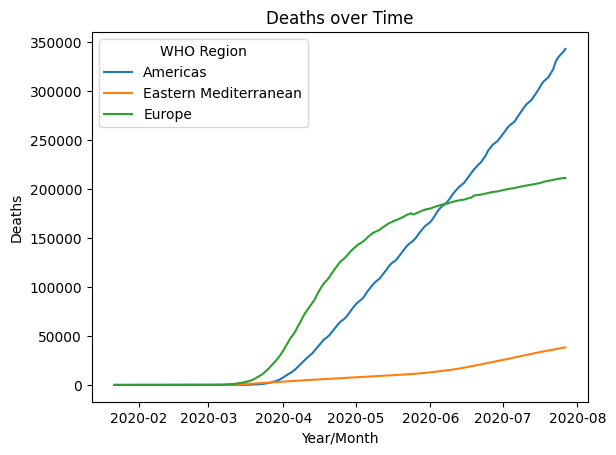

In [14]:

df_line = df[['WHO Region', 'Deaths', 'Date']]
df_line = df.loc[df['WHO Region'].isin(['Americas', 'Eastern Mediterranean', 'Europe'])]
df_line = df_line.groupby(['WHO Region', 'Date']).sum('Deaths')

sns.lineplot(data=df_line, x='Date', y='Deaths', hue='WHO Region')
plt.xlabel('Year/Month')
plt.ylabel('Deaths')
plt.title('Deaths over Time')

Text(0.5, 1.0, 'Deaths by Continent')

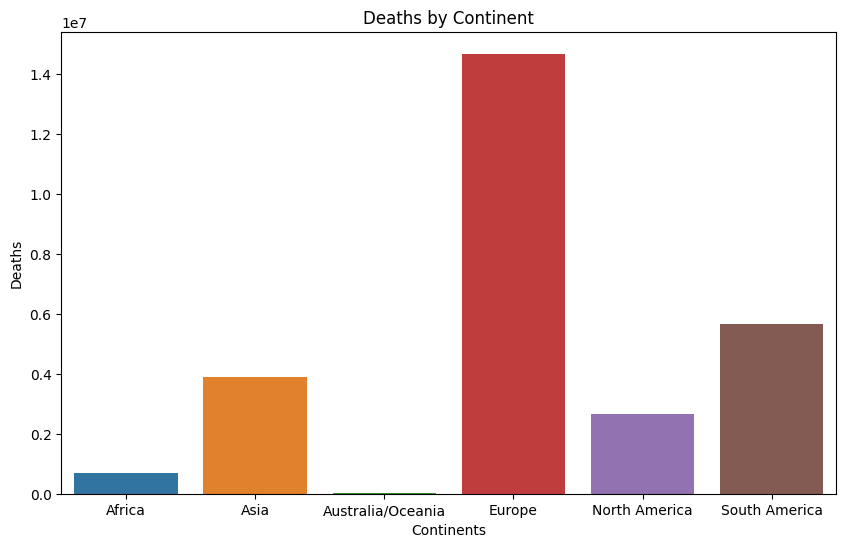

In [15]:
bar_data = country_data.groupby(['Continent']).sum('Deaths')

plt.figure(figsize=(10,6))
sns.barplot(x=bar_data.index, y=bar_data['Deaths'])
plt.xlabel('Continents')
plt.title('Deaths by Continent')

Respondendo as perguntas:
1. Quais os 2 continentes com maior número de mortes?
   Europe e South America
2. Qual o continente com menor número de mortes?
   Oceania
3. Qual sua hipótese para responder às perguntas anteriores?
   É a informação que os gráficos mostram.
   

<Axes: xlabel='Deaths/Population (In Millions)', ylabel='Population'>

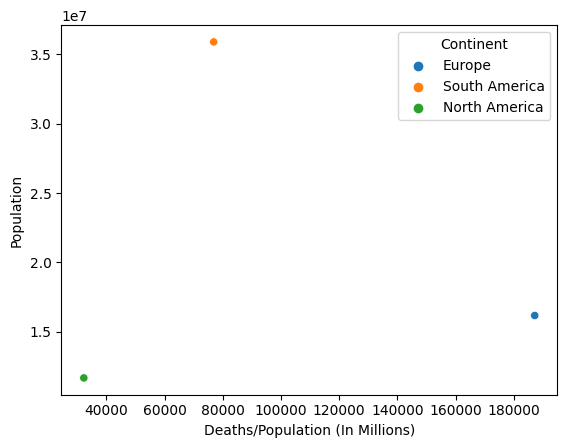

In [16]:
country_data['Deaths/Population (In Millions)'] = (country_data['Deaths'] / country_data['Population']) * 10e6
scatter_data = country_data.groupby(['Continent']).mean('Deaths/Population (In Millions)')
scatter_data = scatter_data.sort_values(by='Deaths/Population (In Millions)', ascending=False).head(3)


sns.scatterplot(data=scatter_data, x='Deaths/Population (In Millions)', y='Population', hue='Continent')

Respondendo as perguntas:
1. Onde se concentram a maioria dos dados? Europe
2. No segundo continentes por mais mortes por milhão, é possível perceber
alguma relação entre as features? Na South America mesmo possuindo uma população muito maior que os outros o numero de mortes por milhão não está maior.
3. Pelo gráfico, é possível enxergar relação entre essas colunas do banco de
dados? Sim, estão coerentes com o grafico de mortes por continente


Text(0.5, 1.0, 'Heatmap of Correlation between Population and Teste/1M pop')

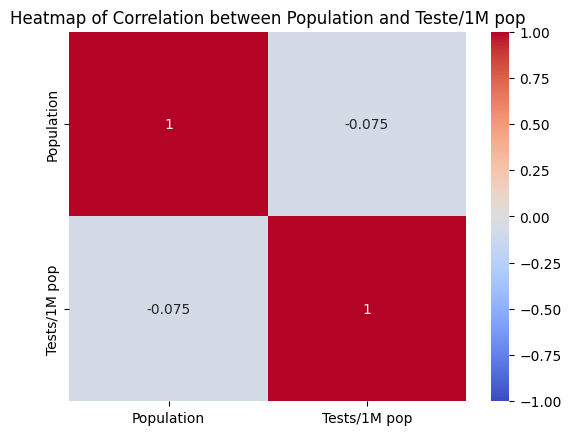

In [17]:
correlation_matrix = world_df[['Population', 'Tests/1M pop']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation between Population and Teste/1M pop')

**As duas variaveis possuem pouquissima relação**